In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\marya\Downloads\insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- Q1. Do smokers have higher insurance charges than non-smokers?
Null Hypothesis - There is no significant difference between insurance charges of smokers and non-smokers.(smokers and non smokers have the same insurance charges

Alternative Hypothesis - There is significant difference between insurance charges of smokers and non-smokers.

Select the correct test : Independent T-test

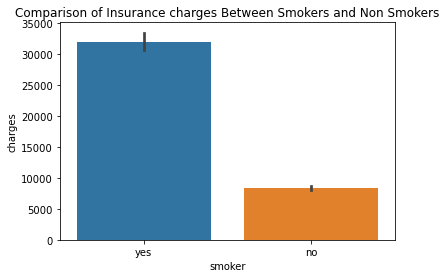

In [17]:
ax = sns.barplot(data=df, x='smoker',y='charges',)
ax.set_title("Comparison of Insurance charges Between Smokers and Non Smokers");

In [35]:
sample = df.sample(n=100,random_state=42)
smoker_charge = sample.loc[ sample['smoker']=='yes',"charges"]
non_smoker_charge = sample.loc[ sample['smoker']=='no',"charges"]

#Mean of the insurance charges for smokers and non-smokers
print(f"For Smokers (n={len(smoker_charge)}): Mean={np.mean(smoker_charge):.2f}")
print(f"For non-smokers (n={len(non_smoker_charge)}): Mean={np.mean(non_smoker_charge):.2f}")

For Smokers (n=22): Mean=32997.31
For non-smokers (n=78): Mean=8394.54


Test the assumptions of your selected test.
Independent T-Test Assumptions:

No significant outliers
Normality 
Equal Variance 
Testing for Outliers

In [23]:
#Testing for Outliers
zscores_f = stats.zscore(smoker_charge)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

0

In [22]:
#Testing for Outliers
zscores_f = stats.zscore(non_smoker_charge)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

2

There are outliers

In [43]:
#Remove outliers
non_smoker_charge= non_smoker_charge[(np.abs(stats.zscore(non_smoker_charge)) < 3)]

In [44]:
#ReTesting for Outliers
zscores_f = stats.zscore(non_smoker_charge)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

0

There are no outliers

In [47]:
#Test of Normalities
result_smoker = stats.normaltest(smoker_charge)
result_smoker

NormaltestResult(statistic=8.481188655372003, pvalue=0.014399031556451041)

In [48]:
result_nonsmoker = stats.normaltest(non_smoker_charge)
result_nonsmoker

NormaltestResult(statistic=4.011538559343466, pvalue=0.1345567441026122)

For the smoker group, the p-value is less than 0.05 so we can assume these are not normal distributions.

In [29]:
#Testing for Equal Variance with Levene's test
result = stats.levene(smoker_charge, non_smoker_charge)
result

LeveneResult(statistic=18.16256301973094, pvalue=4.667281677378614e-05)

Since our p-value was <.05 we reject the null hypothesis that the samples come from populations with equal variances. We have not met the assumption of homogeneity of variances.

Q2. Are men more likely to smoke than women?
Null Hypothesis - There is no relationship between gender and likelihood to smoke

Alternative Hypothesis - There is a relationship between gender and smoking  

- Select the correct test: Chi-square test

- Test the assumptions of your selected test: 
- Show a supporting visualization that helps display the result

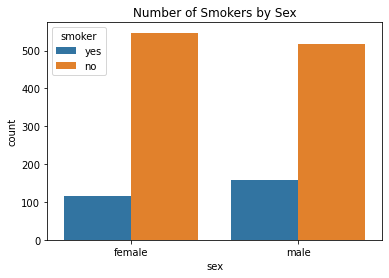

In [9]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

In [10]:
comparison = pd.crosstab(df['sex'], df['smoker'])
comparison

smoker,no,yes
sex,,
female,547,115
male,517,159


In [11]:
result = stats.chi2_contingency(comparison)
chi2, p, deg_free, expected_vals = result

In [12]:
print(p)
p<.05

0.006548143503580696


True

Since our p < .05, we reject the null hypothesis that there is no relationship between gender and likelihood of smoking.Hence, accept the alternate hypothesis and conclude that there is a relationship between gender and smoking.{men are more likely to smoke than women

- Q3. Do different regions have different charges, on average?
- Null Hypothesis - There is no significant difference between the amount of insurance charge in different regions.

- Alternate Hypothesis - There is a significant difference between the amount of insurance charge in different regions.

- Select the correct test: 

- Test the assumptions of your selected test: 
- Show a supporting visualization that helps display the result


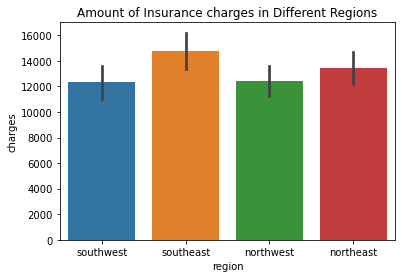

In [15]:
ax = sns.barplot(data=df, x='region',y='charges',)
ax.set_title("Amount of Insurance charges in Different Regions");